## Model comparinson

Define hypothesis about which combination would work best. Evaluate hypothesis with this code.

Hypothese ist, dass alle ziemlich gut performen und Inception sicher gut genug ist. MobileNet dafür sicher nicht so gut
Resultat: Eigentlich ist nur DenseNet gut. Überraschend mit simplea head und nichr drop out. MoblieNet ist erstaunlich gut.

In [1]:
import torch
import tensorflow as tf
%load_ext autoreload

# enable GPU
device = "mps" if torch.backends.mps.is_available() else "cpu"
x = torch.rand(size=(3, 4)).to(device)

gpus = tf.config.list_physical_devices('GPU')
if len(gpus) > 1:
    tf.config.set_visible_devices(gpus[1], 'GPU')
    print("Nutze GPU:", gpus[1])

In [3]:
results = []

In [ ]:
%autoreload 2
from data_loader import load_image_data
import config

X_train_299, X_val_299, y_train_299, y_val_299, label_map_299 = load_image_data(
    csv_file=config.CSV_FILE,
    img_size=(299, 299),
    images_per_label=config.IMAGES_PER_LABEL,
    validation_split=0.2,
)

X_train_224, X_val_224, y_train_224, y_val_224, label_map_224 = load_image_data(
    csv_file=config.CSV_FILE,
    img_size=(224, 224),
    images_per_label=config.IMAGES_PER_LABEL,
    validation_split=0.2,
)

X_train_300, X_val_300, y_train_300, y_val_300, label_map_300 = load_image_data(
    csv_file=config.CSV_FILE,
    img_size=(300, 300),
    images_per_label=config.IMAGES_PER_LABEL,
    validation_split=0.2,
    preprocessing="efficient"
)

In [11]:
X_train_300, X_val_300, y_train_300, y_val_300, label_map_300 = load_image_data(
    csv_file=config.CSV_FILE,
    img_size=(300, 300),
    images_per_label=20,
    # images_per_label=config.IMAGES_PER_LABEL,
    validation_split=0.2,
    preprocessing="efficient"
)

In [30]:
%autoreload 2
from model_benchmark import evaluate_model
from data_loader import update_results
import config

results = result_eff_netb3 = evaluate_model(
    X_train_300,
    X_val_300,
    y_train_300,
    y_val_300,
    label_map_300,
    'EfficientNetB3',
    config.EPOCHS
)

update_results(results)

['simple']
simple
<function head_simple at 0xbd70e8af0>
Training EfficientNetB3 with head simple...
Evaluating EfficientNetB3 with head simple...
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 7s/step


,backbone,head,accuracy,f1_score,end_val_loss,history,y_true,y_pred
0,EfficientNetB3,simple,0.8,0.79127,0.758549,"{'accuracy': [0.15416666865348816, 0.491666674...","[0, 2, 5, 3, 0, 9, 10, 7, 10, 13, 4, 2, 11, 14...","[2, 2, 5, 3, 0, 9, 10, 7, 10, 13, 4, 2, 0, 14,..."


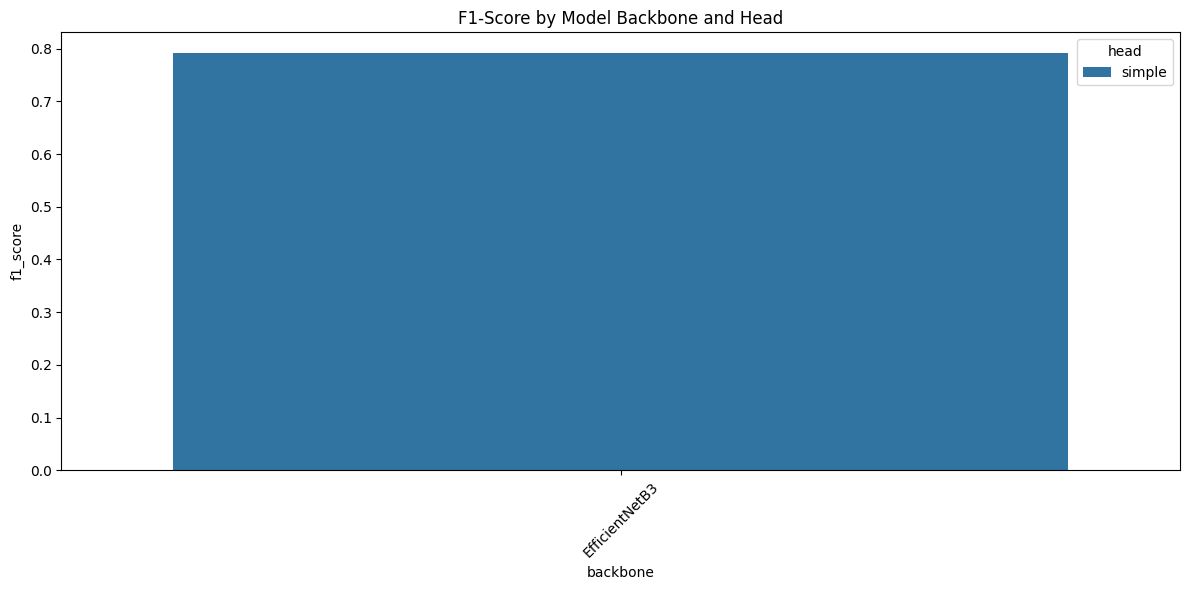

Model: EfficientNetB3 + simple, F1-Score: 79.13%, Accuracy: 80.00%, Final Val_loss: 75.85%


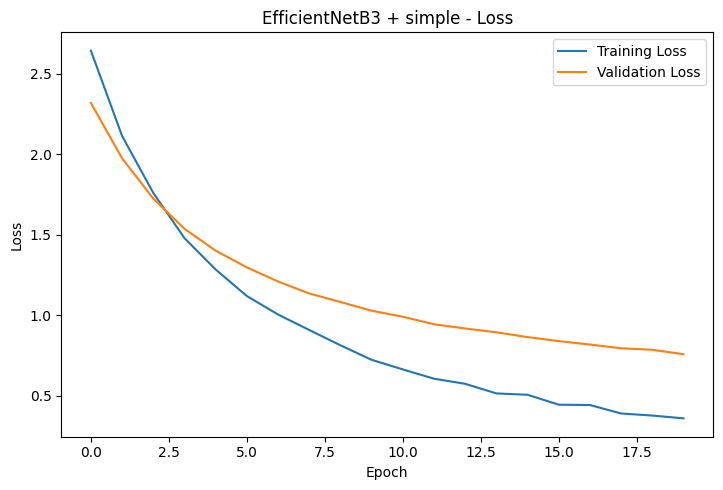

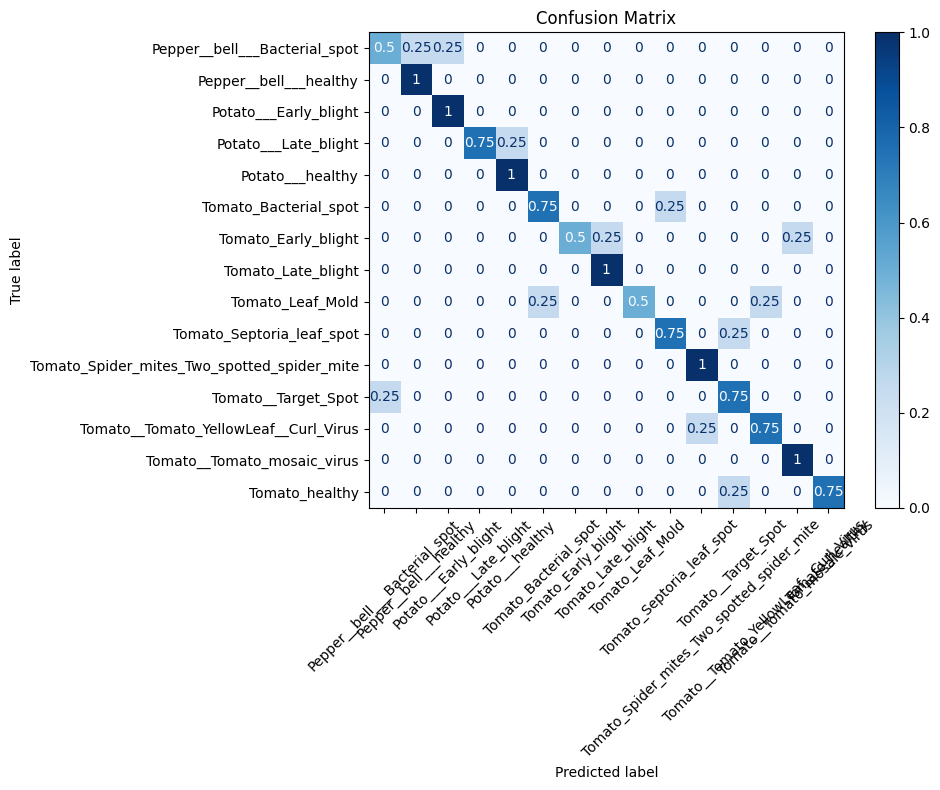

In [32]:
%autoreload 2

# Display results
import matplotlib.pyplot as plt
import seaborn as sns
from visualization_tools import plot_loss_curves, plot_conf_matrix
from data_loader import get_results

results = get_results()

# print(results)
results.style.format({"accuracy": "{:.2%}", "f1_score": "{:.2%}"})

top_results = results.sort_values(by="f1_score", ascending=False)
display(top_results)

plt.figure(figsize=(12, 6))
sns.barplot(data=results, x="backbone", y="f1_score", hue="head")
plt.title("F1-Score by Model Backbone and Head")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


for result in results.itertuples():
    print(f"Model: {result.backbone} + {result.head}, F1-Score: {result.f1_score:.2%}, Accuracy: {result.accuracy:.2%}, Final Val_loss: {result.end_val_loss:.2%}")
    # Plot accuracy and loss
    plot_loss_curves(result.history['loss'], result.history['val_loss'], model_name= f"{result.backbone} + {result.head}")

    # Plot confusion matrix
    plot_conf_matrix(
        y_true=result.y_true,
        y_pred=result.y_pred,
        class_names=list(label_map_300.keys()),
        normalize='true'
    )

In [ ]:
# %reload_ext autoreload
# %load_ext autoreload
%autoreload 2
from data_loader import load_image_data
import config

X_train, X_val, y_train, y_val, label_map = load_image_data(
    csv_file=config.CSV_FILE,
    img_size=(299, 299),
    images_per_label=20,
    validation_split=0.2
)

In [3]:
# %load_ext autoreload
%autoreload 2
from model_benchmark import evaluate_models
import config

results = evaluate_models(
    csv_path=config.CSV_FILE,
    img_size=(299, 299),
    epochs=config.EPOCHS,
    images_per_label=config.IMAGES_PER_LABEL,
)


2025-06-10 12:05:24.349604: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-06-10 12:05:24.349748: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2025-06-10 12:05:24.349751: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2025-06-10 12:05:24.349978: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-06-10 12:05:24.349998: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Training EfficientNetB0 with head simple...


2025-06-10 12:05:29.072394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


Evaluating EfficientNetB0 with head simple...
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 267ms/step
Training EfficientNetB0 with head dense_dropout...
Evaluating EfficientNetB0 with head dense_dropout...
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 294ms/step
Training EfficientNetB3 with head simple...
Evaluating EfficientNetB3 with head simple...
19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 550ms/step
Training EfficientNetB3 with head dense_dropout...
Evaluating EfficientNetB3 with head dense_dropout...
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 546ms/step
Training InceptionV3 with head simple...
Evaluating InceptionV3 with head simple...
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 289ms/step
Training InceptionV3 with head dense_dropout...
Evaluating InceptionV3 with head dense_dropout...
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 282ms/step


/Users/fionanueesch/Documents/PERS/CAS Machine Inelligence/M3 Deep Learning/Project/DockerDeepLearning/src/model_benchmark.py:122: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base = bmodel(weights='imagenet', include_top=False, input_shape=img_size + (3,))


Training MobileNetV2 with head simple...
Evaluating MobileNetV2 with head simple...
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step
Training MobileNetV2 with head dense_dropout...
Evaluating MobileNetV2 with head dense_dropout...
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 219ms/step
Training DenseNet121 with head simple...
Evaluating DenseNet121 with head simple...
19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 569ms/step
Training DenseNet121 with head dense_dropout...
Evaluating DenseNet121 with head dense_dropout...
19/19 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step 
Training Xception with head simple...
Evaluating Xception with head simple...
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 393ms/step
Training Xception with head dense_dropout...
Evaluating Xception with head dense_dropout...
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 414ms/step


,backbone,head,accuracy,f1_score,end_val_loss,loss,val_loss,y_true,y_pred,label_map
8,DenseNet121,simple,0.923858,0.924098,0.267668,"[1.905399203300476, 1.0005508661270142, 0.7128...","[1.2257137298583984, 0.8481978178024292, 0.665...","[5, 8, 14, 6, 7, 7, 5, 14, 2, 7, 1, 3, 14, 6, ...","[5, 8, 14, 6, 7, 7, 5, 14, 2, 7, 1, 3, 14, 6, ...","{'Pepper__bell___Bacterial_spot': 0, 'Pepper__..."
9,DenseNet121,dense_dropout,0.913706,0.913195,0.272912,"[3.309429168701172, 1.9772945642471313, 1.3713...","[1.0620523691177368, 0.6557626128196716, 0.465...","[5, 8, 14, 6, 7, 7, 5, 14, 2, 7, 1, 3, 14, 6, ...","[5, 8, 14, 6, 7, 7, 5, 14, 2, 7, 1, 3, 14, 6, ...","{'Pepper__bell___Bacterial_spot': 0, 'Pepper__..."
6,MobileNetV2,simple,0.898477,0.896408,0.307547,"[1.538965106010437, 0.7126712203025818, 0.5083...","[0.8910494446754456, 0.636308491230011, 0.5176...","[5, 8, 14, 6, 7, 7, 5, 14, 2, 7, 1, 3, 14, 6, ...","[5, 8, 14, 7, 7, 7, 5, 14, 2, 7, 1, 3, 14, 6, ...","{'Pepper__bell___Bacterial_spot': 0, 'Pepper__..."
7,MobileNetV2,dense_dropout,0.881557,0.879906,0.407153,"[2.7911038398742676, 1.4373741149902344, 1.051...","[0.8499016165733337, 0.48079121112823486, 0.45...","[5, 8, 14, 6, 7, 7, 5, 14, 2, 7, 1, 3, 14, 6, ...","[6, 8, 14, 12, 7, 7, 5, 14, 2, 7, 1, 2, 14, 6,...","{'Pepper__bell___Bacterial_spot': 0, 'Pepper__..."
4,InceptionV3,simple,0.868020,0.869289,0.411053,"[1.5686826705932617, 0.7867295145988464, 0.571...","[0.9788928031921387, 0.7341822385787964, 0.617...","[5, 8, 14, 6, 7, 7, 5, 14, 2, 7, 1, 3, 14, 6, ...","[5, 8, 14, 6, 7, 7, 5, 14, 2, 7, 1, 3, 14, 6, ...","{'Pepper__bell___Bacterial_spot': 0, 'Pepper__..."
10,Xception,simple,0.851100,0.851988,0.427395,"[1.696507453918457, 0.9270761013031006, 0.6977...","[1.16007399559021, 0.8591817021369934, 0.73773...","[5, 8, 14, 6, 7, 7, 5, 14, 2, 7, 1, 3, 14, 6, ...","[5, 8, 14, 6, 7, 7, 9, 14, 2, 7, 1, 3, 14, 6, ...","{'Pepper__bell___Bacterial_spot': 0, 'Pepper__..."
5,InceptionV3,dense_dropout,0.851100,0.850286,0.501369,"[4.84662389755249, 3.16426420211792, 2.2414267...","[1.1966660022735596, 1.178609848022461, 0.7491...","[5, 8, 14, 6, 7, 7, 5, 14, 2, 7, 1, 3, 14, 6, ...","[5, 7, 14, 6, 7, 3, 5, 14, 2, 7, 1, 3, 14, 6, ...","{'Pepper__bell___Bacterial_spot': 0, 'Pepper__..."
11,Xception,dense_dropout,0.847716,0.849178,0.469274,"[1.9185431003570557, 1.0614948272705078, 0.788...","[0.9067593216896057, 0.6758823990821838, 0.576...","[5, 8, 14, 6, 7, 7, 5, 14, 2, 7, 1, 3, 14, 6, ...","[5, 8, 14, 6, 7, 7, 9, 14, 4, 7, 1, 3, 14, 6, ...","{'Pepper__bell___Bacterial_spot': 0, 'Pepper__..."
2,EfficientNetB3,simple,0.104907,0.046809,2.548883,"[2.732045888900757, 2.7175707817077637, 2.6910...","[2.6960248947143555, 2.6673128604888916, 2.656...","[5, 8, 14, 6, 7, 7, 5, 14, 2, 7, 1, 3, 14, 6, ...","[7, 7, 2, 7, 5, 5, 7, 2, 2, 2, 7, 7, 7, 7, 7, ...","{'Pepper__bell___Bacterial_spot': 0, 'Pepper__..."
3,EfficientNetB3,dense_dropout,0.113367,0.041010,2.599305,"[3.3271679878234863, 3.3082003593444824, 3.277...","[2.73512601852417, 2.7223575115203857, 2.68021...","[5, 8, 14, 6, 7, 7, 5, 14, 2, 7, 1, 3, 14, 6, ...","[8, 8, 13, 8, 5, 5, 8, 13, 13, 13, 5, 8, 8, 5,...","{'Pepper__bell___Bacterial_spot': 0, 'Pepper__..."


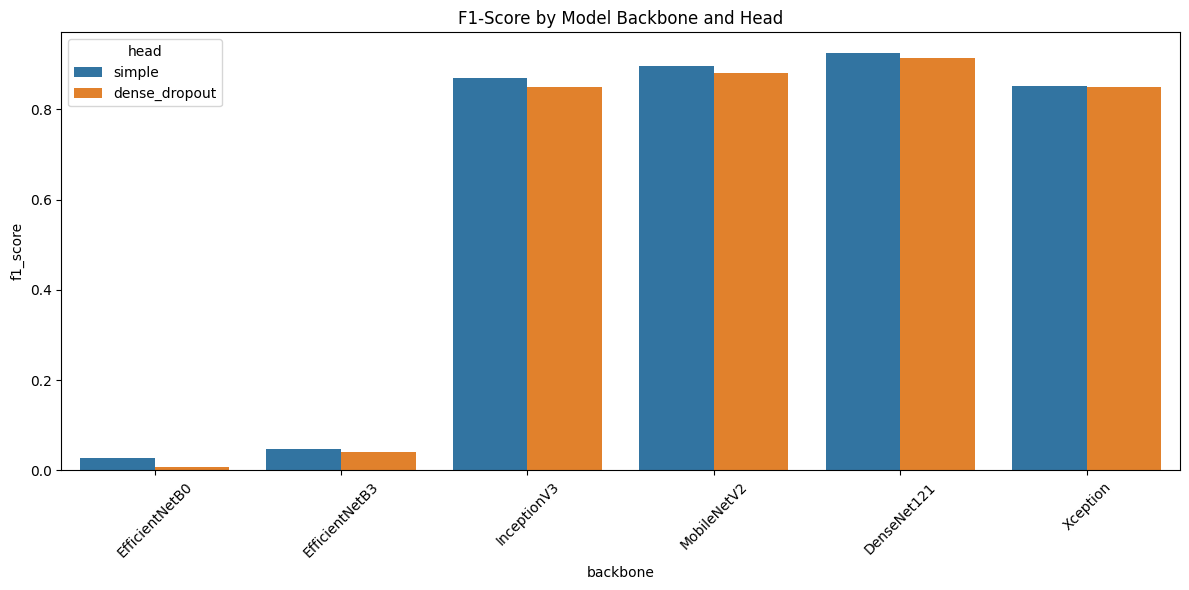

Model: EfficientNetB0 + simple, F1-Score: 2.83%, Accuracy: 10.32%, Final Val_loss: 274.24%


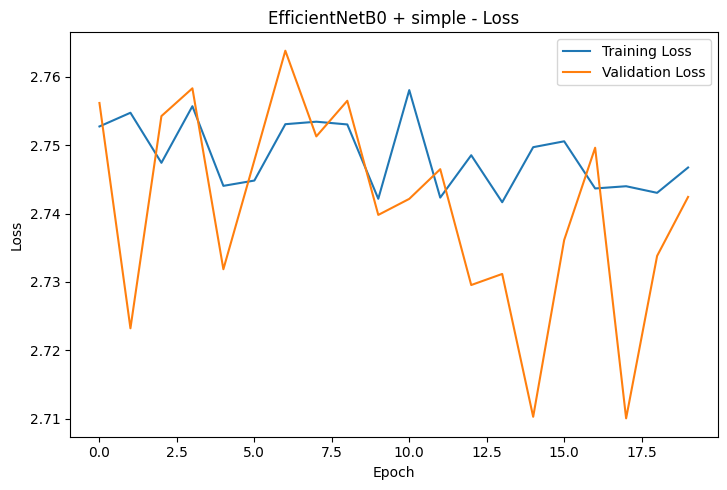

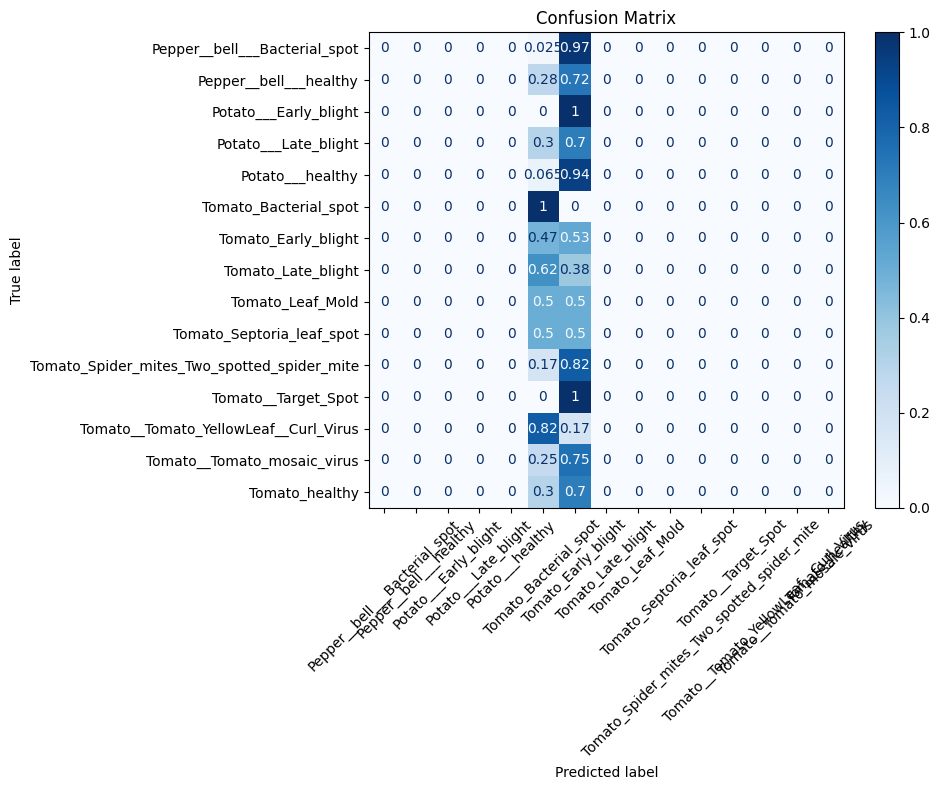

Model: EfficientNetB0 + dense_dropout, F1-Score: 0.86%, Accuracy: 6.77%, Final Val_loss: 276.26%


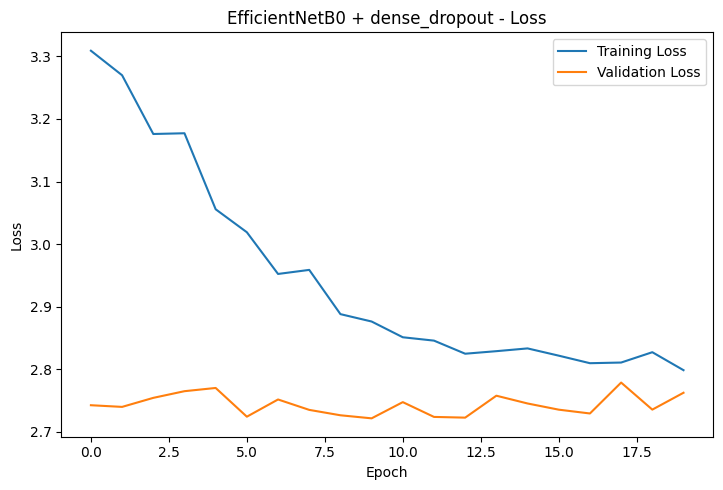

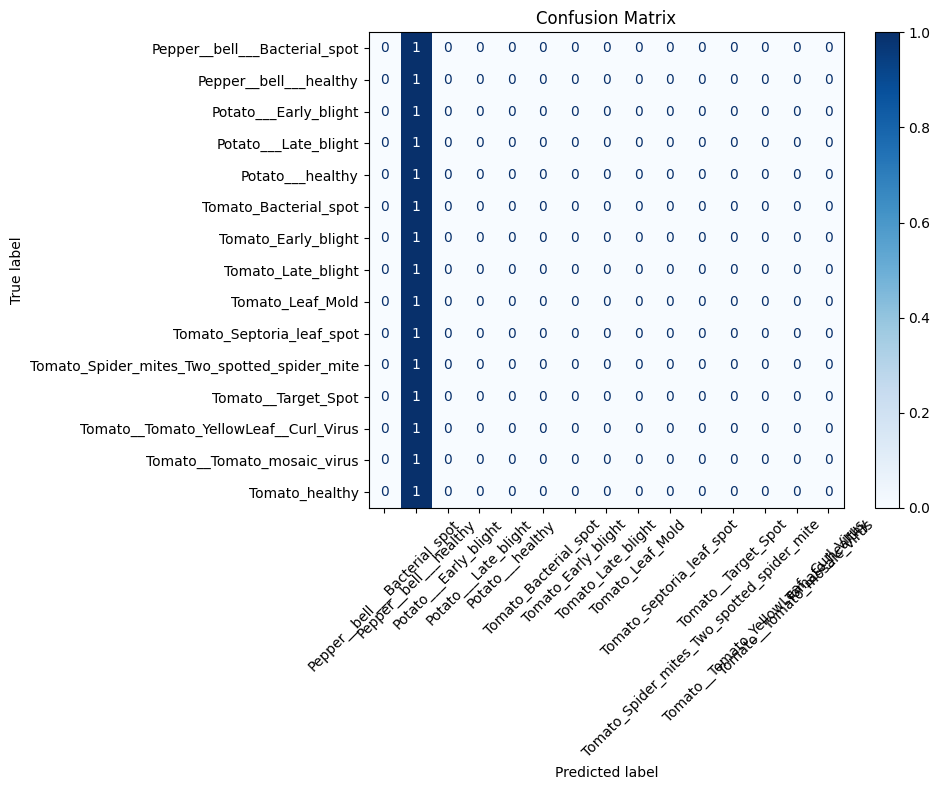

Model: EfficientNetB3 + simple, F1-Score: 4.68%, Accuracy: 10.49%, Final Val_loss: 254.89%


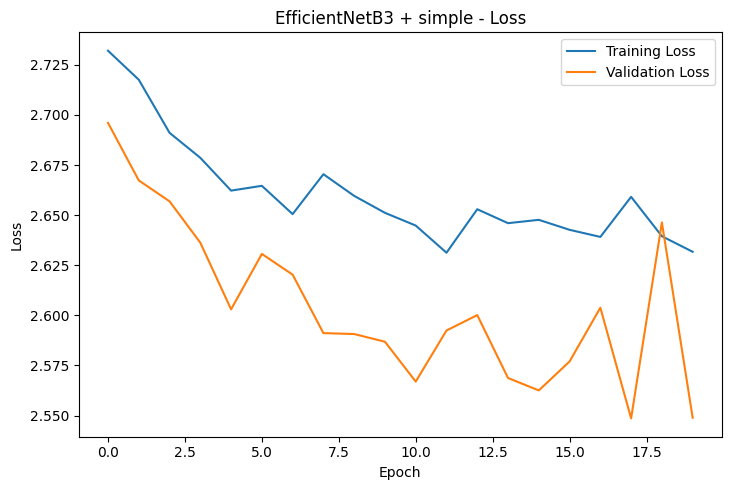

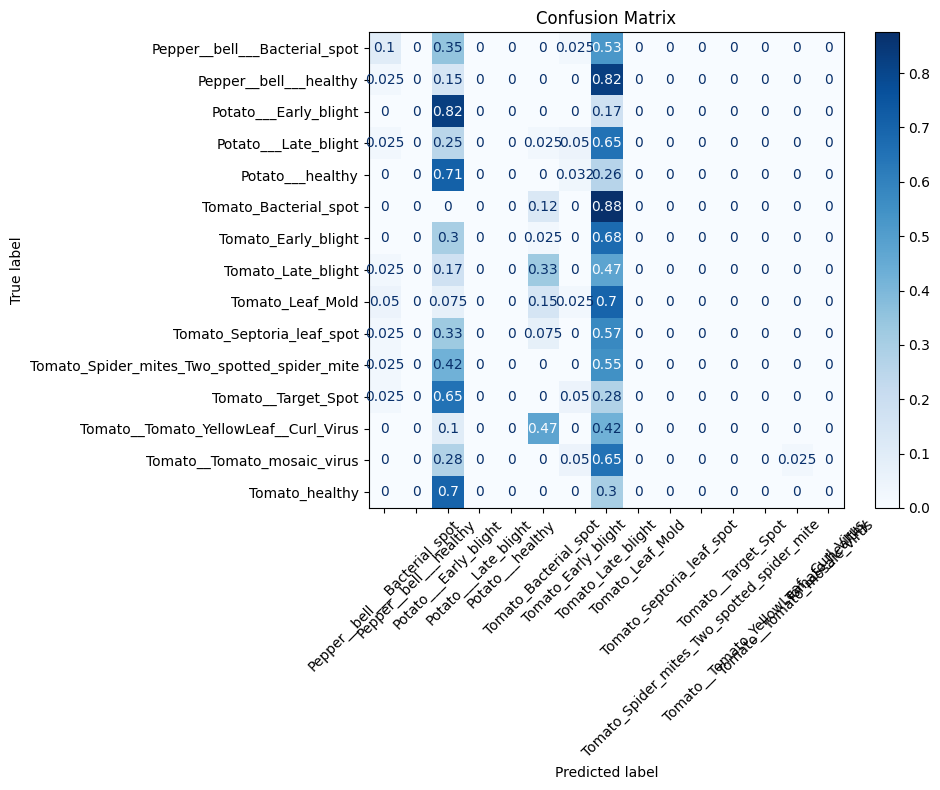

Model: EfficientNetB3 + dense_dropout, F1-Score: 4.10%, Accuracy: 11.34%, Final Val_loss: 259.93%


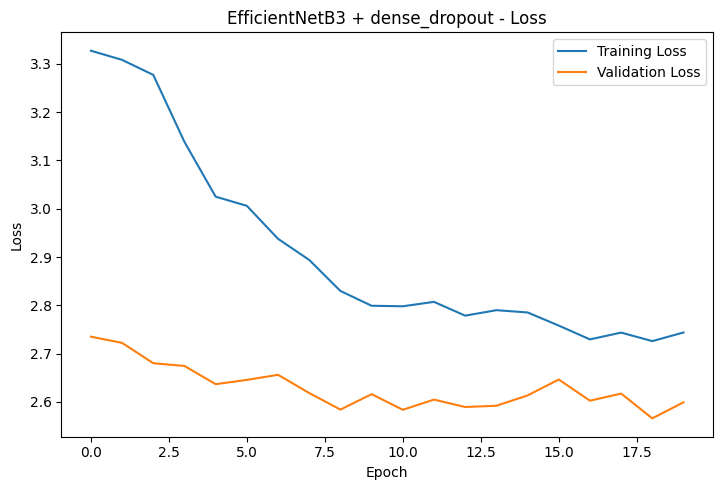

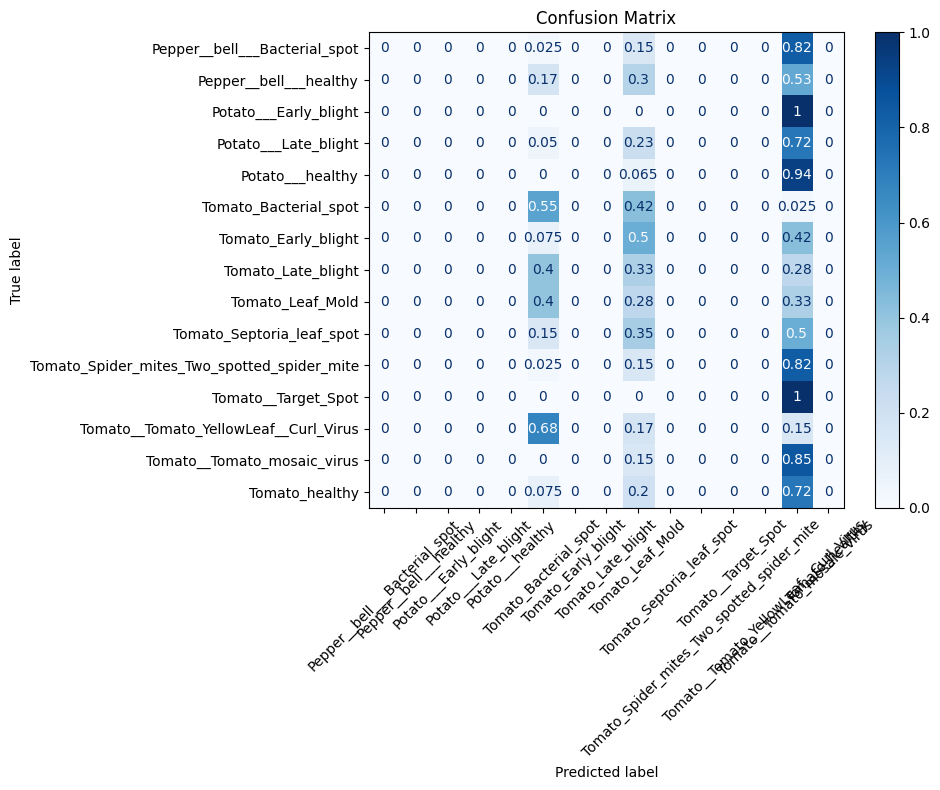

Model: InceptionV3 + simple, F1-Score: 86.93%, Accuracy: 86.80%, Final Val_loss: 41.11%


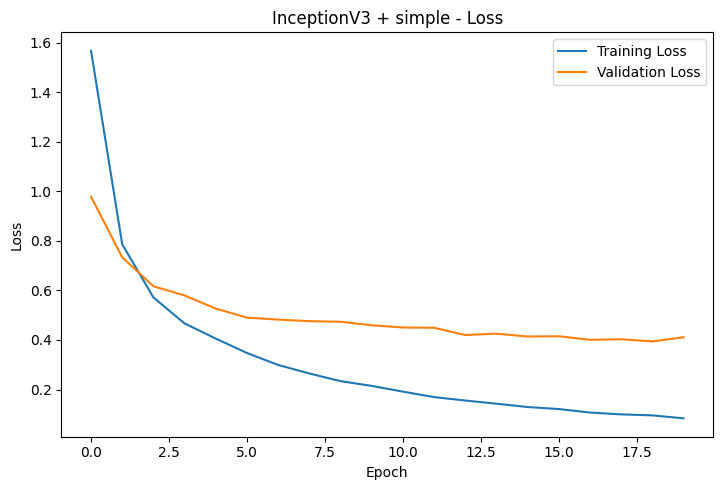

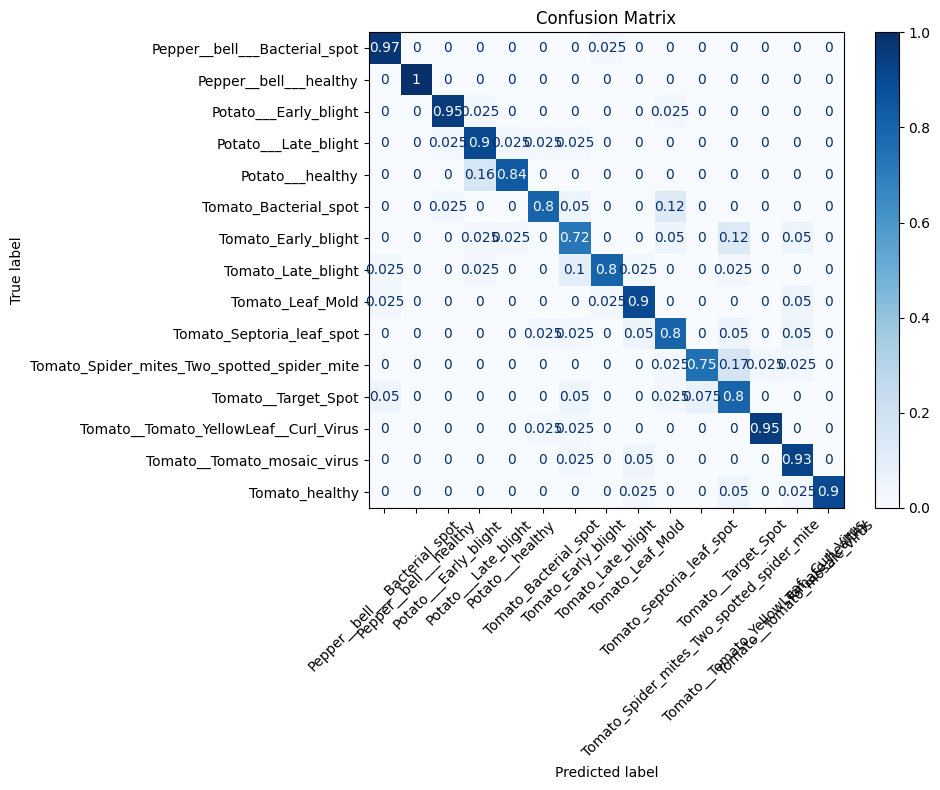

Model: InceptionV3 + dense_dropout, F1-Score: 85.03%, Accuracy: 85.11%, Final Val_loss: 50.14%


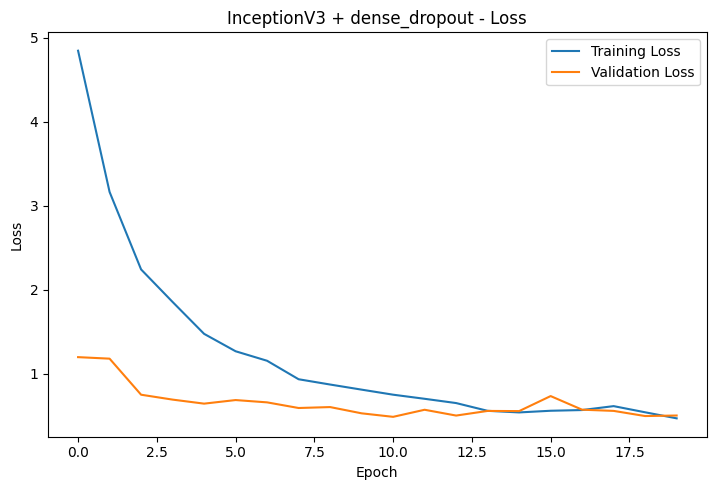

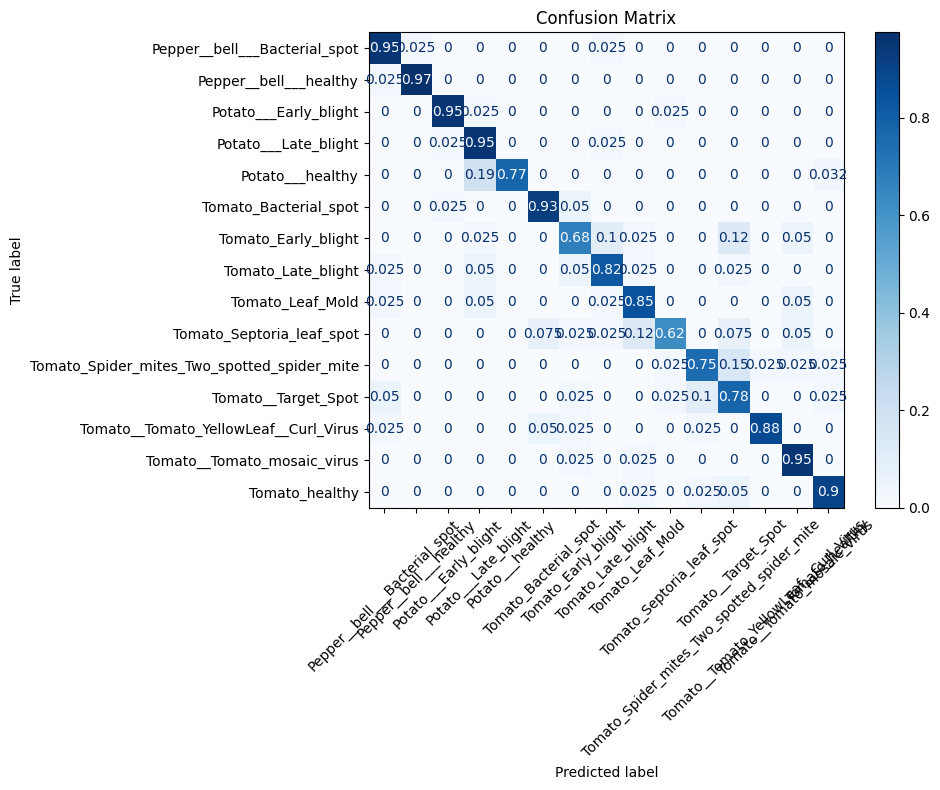

Model: MobileNetV2 + simple, F1-Score: 89.64%, Accuracy: 89.85%, Final Val_loss: 30.75%


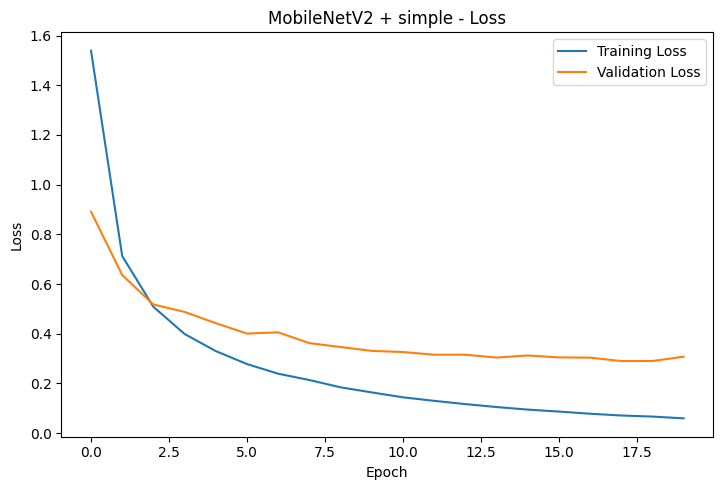

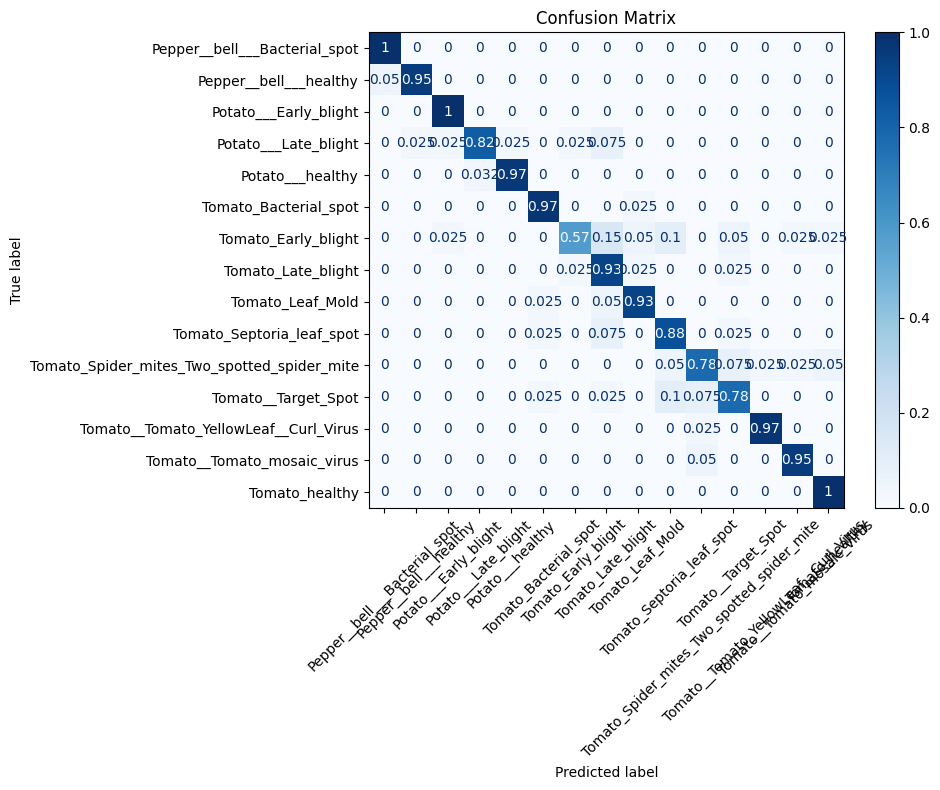

Model: MobileNetV2 + dense_dropout, F1-Score: 87.99%, Accuracy: 88.16%, Final Val_loss: 40.72%


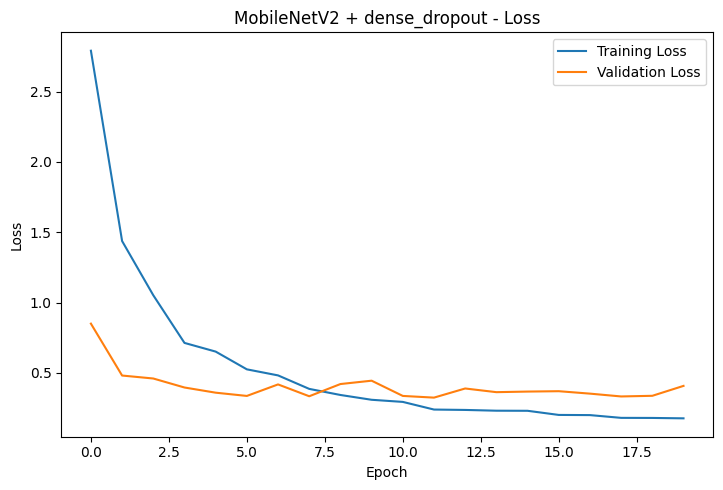

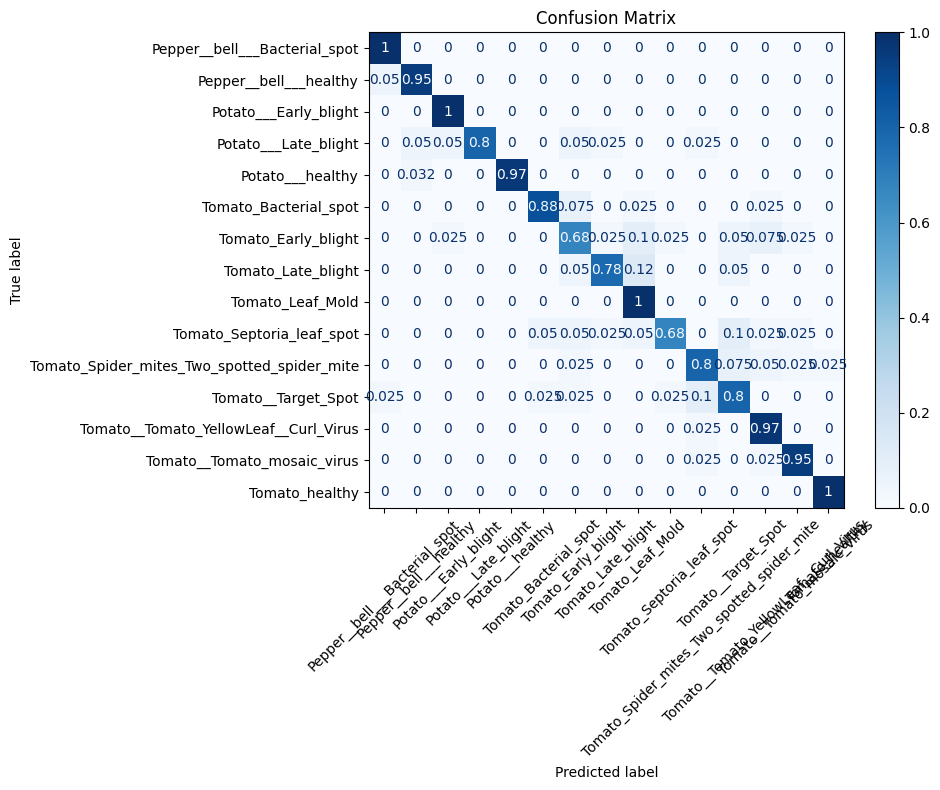

Model: DenseNet121 + simple, F1-Score: 92.41%, Accuracy: 92.39%, Final Val_loss: 26.77%


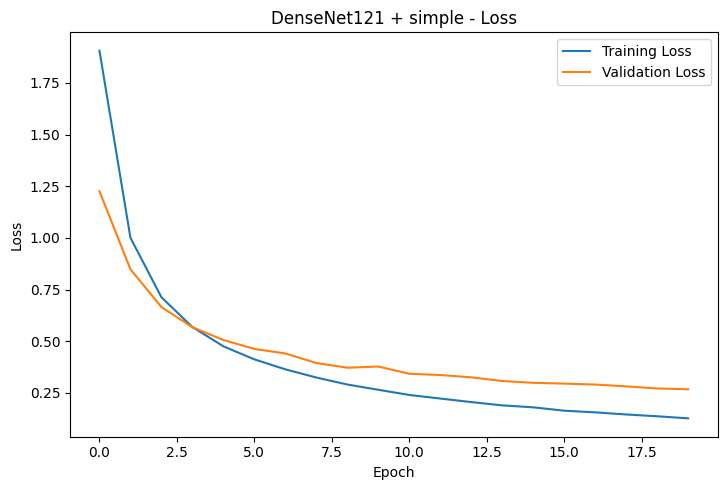

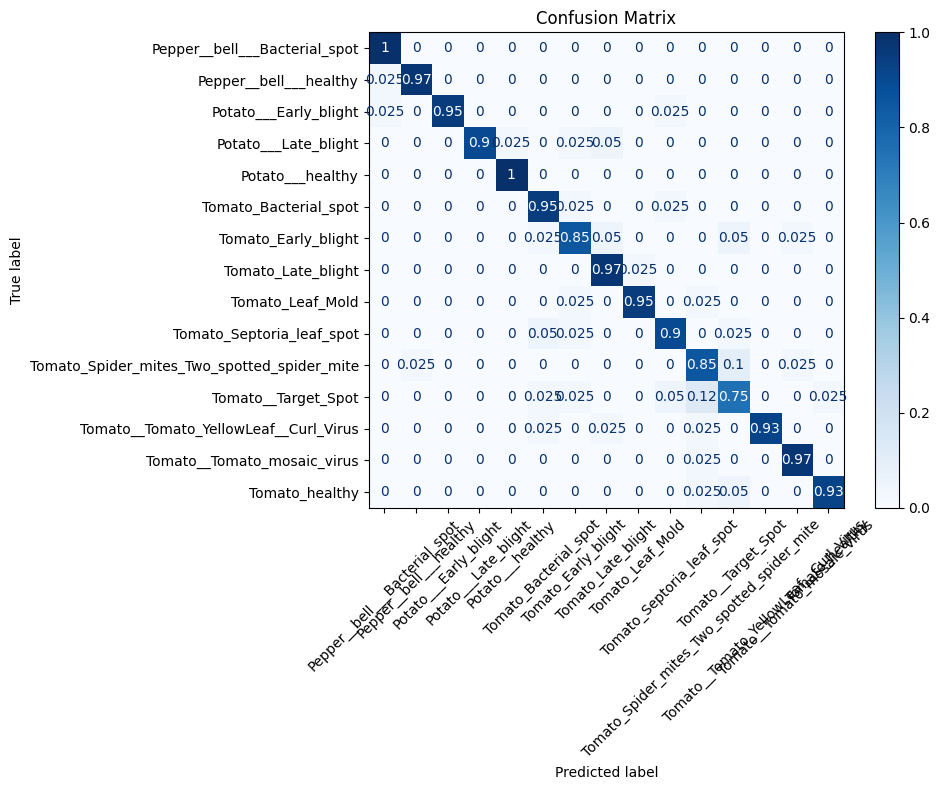

Model: DenseNet121 + dense_dropout, F1-Score: 91.32%, Accuracy: 91.37%, Final Val_loss: 27.29%


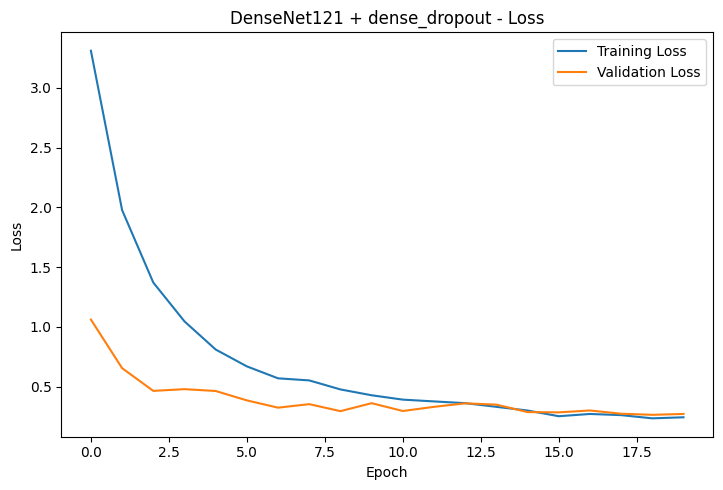

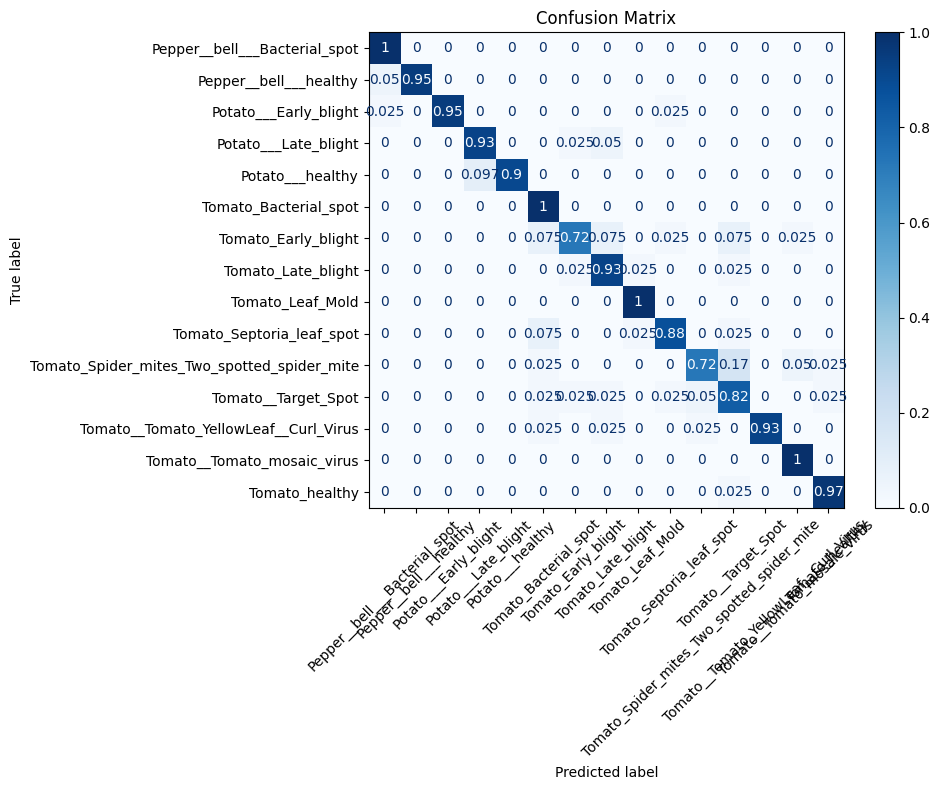

Model: Xception + simple, F1-Score: 85.20%, Accuracy: 85.11%, Final Val_loss: 42.74%


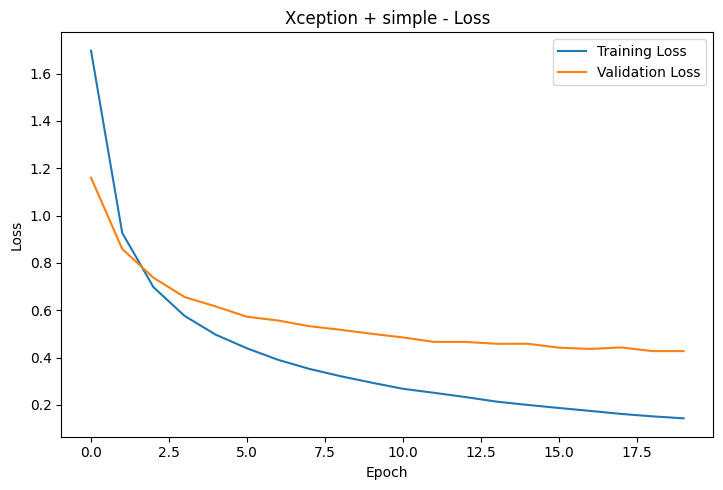

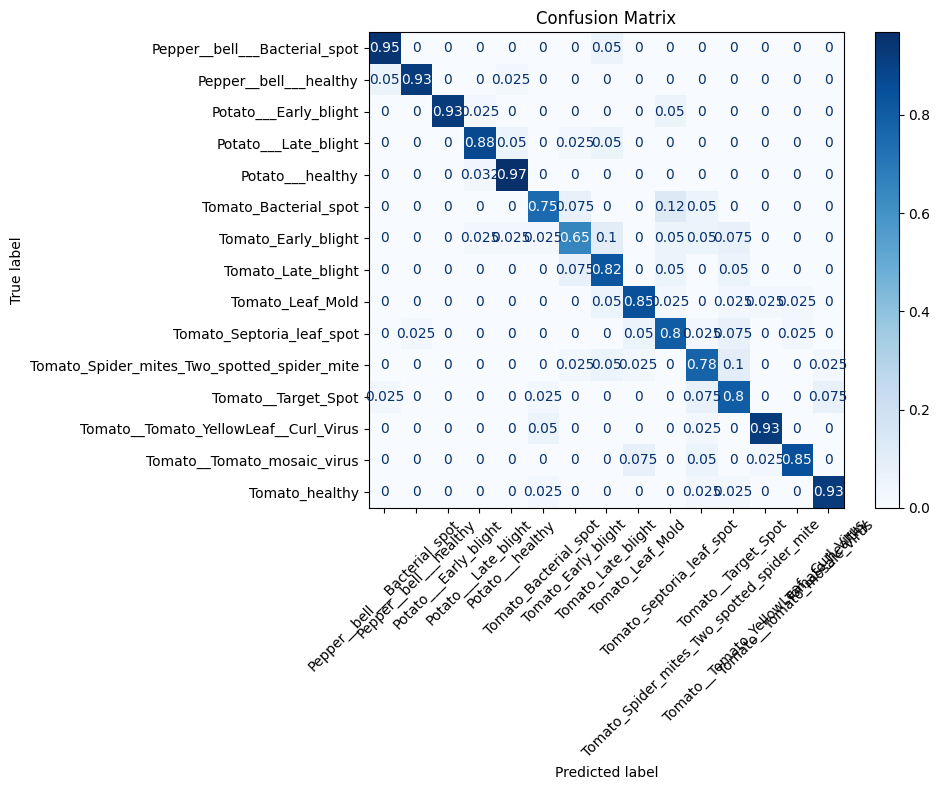

Model: Xception + dense_dropout, F1-Score: 84.92%, Accuracy: 84.77%, Final Val_loss: 46.93%


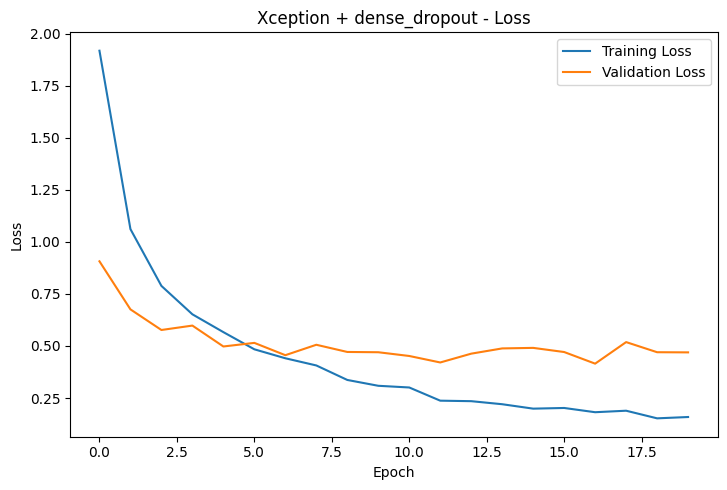

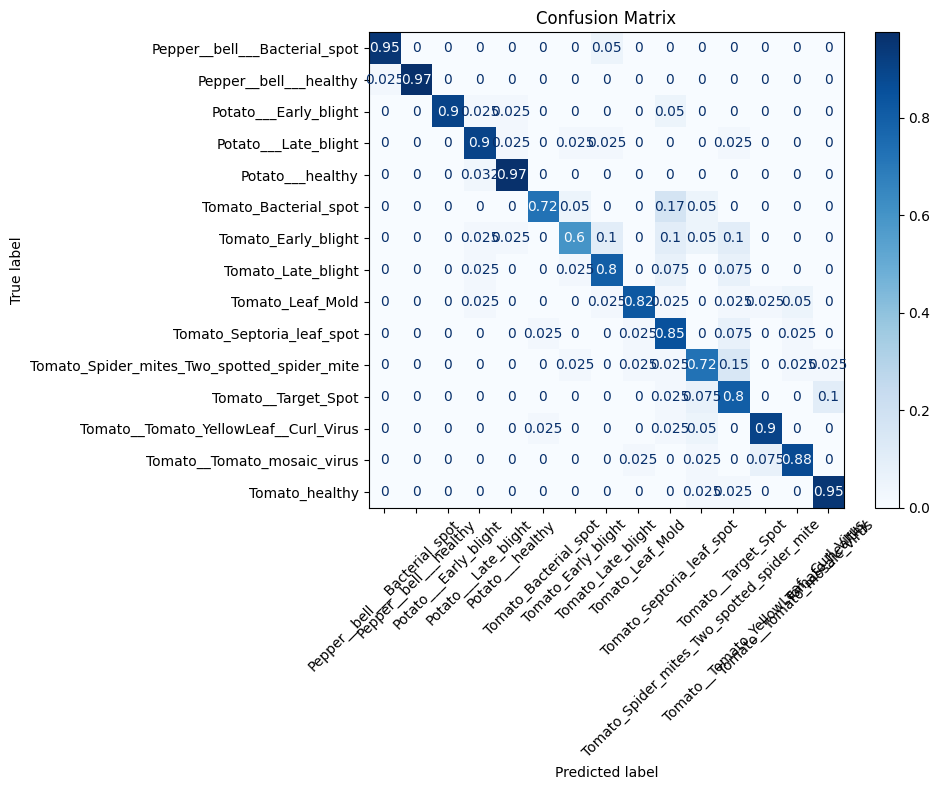

In [4]:
# %load_ext autoreload
%autoreload 2

# Display results
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from visualization_tools import plot_loss_curves, plot_conf_matrix

# print(results)
results.style.format({"accuracy": "{:.2%}", "f1_score": "{:.2%}"})

top_results = results.sort_values(by="f1_score", ascending=False)
display(top_results)

plt.figure(figsize=(12, 6))
sns.barplot(data=results, x="backbone", y="f1_score", hue="head")
plt.title("F1-Score by Model Backbone and Head")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


for result in results.itertuples():
    print(f"Model: {result.backbone} + {result.head}, F1-Score: {result.f1_score:.2%}, Accuracy: {result.accuracy:.2%}, Final Val_loss: {result.end_val_loss:.2%}")
    # Plot accuracy and loss
    plot_loss_curves(result.loss, result.val_loss, model_name= f"{result.backbone} + {result.head}")

    # Plot confusion matrix
    plot_conf_matrix(
        y_true=result.y_true,
        y_pred=result.y_pred,
        class_names=list(result.label_map.keys()),
        normalize='true'
    )